In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data Preprocessing

In [41]:
data= pd.read_csv(r'C:\Users\prana\Desktop\projects\VSJ\data\real.csv')
data.head()

,Specification,Project,Price,Area
0,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,"₹ 32 Lac₹ 7,692/sq.ft.",416 sq.ft. (39 sq.m.) Super built-up Area
1,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,"₹ 31.5 Lac₹ 5,431/sq.ft.",580 sq.ft. (54 sq.m.) Built-up Area
2,3 BHK Residential Apartment in Hinjewadi Phase 2,TCG The Crown Greens,"₹ 96 Lac₹ 5,714/sq.ft.","1,680 sq.ft. (156 sq.m.) Super built-up Area"
3,1 BHK Residential Apartment in Hinjewadi,Paranjape Blue Ridge,"₹ 55 Lac₹ 12,359/sq.ft.",445 sq.ft. (41 sq.m.) Super built-up Area
4,2 BHK Residential Apartment in Marunji,Hinjewadi Hills,"₹ 29.99 Lac₹ 5,767/sq.ft.",520 sq.ft. (48 sq.m.) Built-up Area


In [42]:
data.Price= data.Price.str.split(' ').str[1]        #splitting and attaching the data
data.head()

,Specification,Project,Price,Area
0,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,32,416 sq.ft. (39 sq.m.) Super built-up Area
1,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,31.5,580 sq.ft. (54 sq.m.) Built-up Area
2,3 BHK Residential Apartment in Hinjewadi Phase 2,TCG The Crown Greens,96,"1,680 sq.ft. (156 sq.m.) Super built-up Area"
3,1 BHK Residential Apartment in Hinjewadi,Paranjape Blue Ridge,55,445 sq.ft. (41 sq.m.) Super built-up Area
4,2 BHK Residential Apartment in Marunji,Hinjewadi Hills,29.99,520 sq.ft. (48 sq.m.) Built-up Area


In [43]:
data.Area= data.Area.str.split(' ').str[0]
data.head()

,Specification,Project,Price,Area
0,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,32,416
1,2 BHK Residential Apartment in Hinjewadi,Xrbia Hinjewadi,31.5,580
2,3 BHK Residential Apartment in Hinjewadi Phase 2,TCG The Crown Greens,96,"1,680"
3,1 BHK Residential Apartment in Hinjewadi,Paranjape Blue Ridge,55,445
4,2 BHK Residential Apartment in Marunji,Hinjewadi Hills,29.99,520


In [44]:
data.dtypes

Specification    object
Project          object
Price            object
Area             object
dtype: object

In [45]:
data.Area=data.Area.str.replace(',','')     #replacing comma 

In [46]:
data.Area.head(5)

0     416
1     580
2    1680
3     445
4     520
Name: Area, dtype: object

In [108]:
data[['Price','Area','Specification','Project']]= data[['Price','Area','Specification','Project']].astype(float)    #changing the datatypes
data.dtypes

Specification    float64
Project          float64
Area             float64
Price            float64
dtype: object

In [109]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()                                              # applying label encoder for converting data as categorical numerical data
data.Specification= LE.fit_transform(data.Specification)
data.Project=LE.fit_transform(data.Project)
data.head()

,Specification,Project,Area,Price
0,5,15,0.085384,0.326316
1,5,15,0.204052,0.321053
2,8,10,1.000000,1.000000
3,2,6,0.106368,0.568421
4,6,2,0.160637,0.305158


In [110]:
from mlxtend.preprocessing import minmax_scaling
Area= minmax_scaling(data.Area, columns=[0])                   # applying scaling for data homoginity on continous variables
Price= minmax_scaling(data.Price, columns=[0])

C:\Users\prana\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [111]:
data= data.drop(['Price','Area'],axis=1)

In [112]:
data['Area']= Area
data['Price']= Price
data.head()

,Specification,Project,Area,Price
0,5,15,0.085384,0.326316
1,5,15,0.204052,0.321053
2,8,10,1.000000,1.000000
3,2,6,0.106368,0.568421
4,6,2,0.160637,0.305158


### Model building

In [113]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [114]:
X= data.drop('Price',axis=1)
y= data.Price
print(X.shape)
print(y.shape)

(624, 3)
(624,)


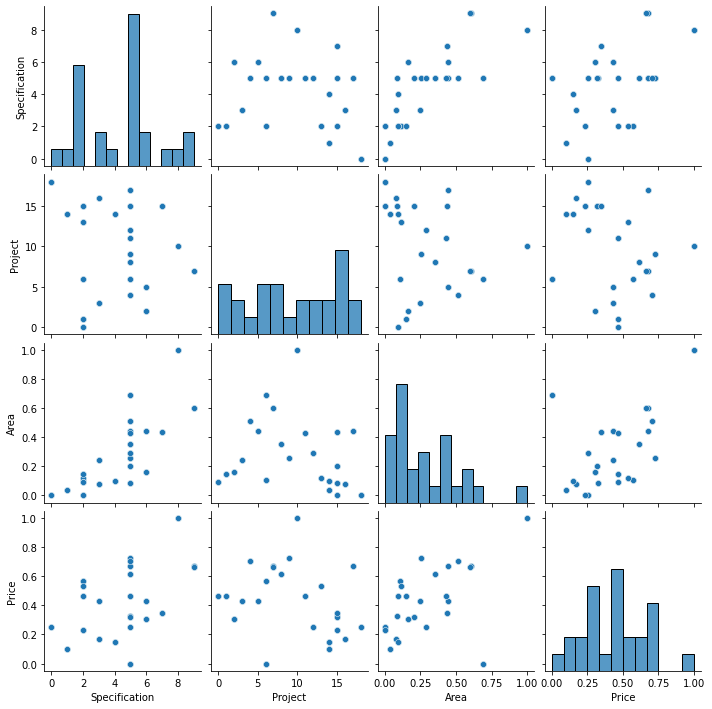

In [118]:
import seaborn as sns                    # for Exploratory analysis on data to find out relations
sns.pairplot(data)

In [115]:
from sklearn.model_selection import train_test_split                                             # splitting the data for testing and training purpose
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
#### Applying Lasso and Ridge as hyper parameter in LR

In [119]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.0005)

In [120]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0005)

In [121]:
lasso.score(x_test,y_test)

0.29728462957413726

In [122]:
from sklearn.linear_model import Ridge
ridge= Ridge()

In [123]:
ridge.fit(x_train,y_train)

Ridge()

In [124]:
ridge.score(x_test,y_test)

0.295397407718736